### reproducing Jason White's code

In [1]:
import numpy as np
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime as DT


#### change to correct working directory

In [41]:
os.chdir(u'C:/Users/kesj/Documents/SFinfo/DSE/interviewStuff/WorkSample/')
data = pd.read_csv('Data for Cleaning & Modeling.csv',low_memory=False)

In [18]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734,80364,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0,NaN,NaN,10,0,28854,52.10%,42,f
1,10.71%,55742,114426,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0,NaN,NaN,7,0,33623,76.70%,7,f
2,16.99%,57167,137225,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0,41,NaN,10,0,19878,66.30%,17,f
3,13.11%,57245,138150,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0,64,NaN,5,0,2584,40.40%,31,f
4,13.57%,57416,139635,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1,58,NaN,14,0,3511,25.60%,40,f


In [19]:
len(data[data['X1']>0]), len(data)

(338990, 400000)

In [20]:
data['X1'].isnull().sum()

61010

In [21]:
data.X1.dtype

dtype('O')

In [22]:
data.isnull().any()

X1     True
X2     True
X3     True
X4     True
X5     True
X6     True
X7     True
X8     True
X9     True
X10    True
X11    True
X12    True
X13    True
X14    True
X15    True
X16    True
X17    True
X18    True
X19    True
X20    True
X21    True
X22    True
X23    True
X24    True
X25    True
X26    True
X27    True
X28    True
X29    True
X30    True
X31    True
X32    True
dtype: bool

In [10]:
## convert this to float
def convert_pct_to_float(x):
    try: 
        y = np.float(x[:-1])
    except TypeError:
        print x
        y = 0.
        
    return y/100.
#tgt = data.X1.apply(lambda x: np.float(x[:-1])/100.)

In [93]:
data[data.X1>0]['X8'].value_counts()

B    86121
C    76446
D    46984
A    45525
E    21628
F     8395
G     2024
Name: X8, dtype: int64

In [42]:
#data.X1.apply(lambda x: convert_pct_to_float(x))
dd = data[data.X1>0]
dd = dd.drop(['X10','X16','X18'],1)
dd.isnull().sum(axis=0)

X1          0
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      51867
X9      51867
X11         1
X12     51960
X13     51752
X14         1
X15         1
X17         1
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    185457
X26    295590
X27         1
X28         1
X29         1
X30       225
X31         1
X32         1
dtype: int64

In [44]:
#clean nulls
dd.X8 = dd.X8.fillna(0)
dd.X9 = dd.X9.fillna(0)
dd.X12 = dd.X12.fillna(0)
#data.X30 = data.X30.fillna(0)
testing_medians= {}
testing_medians['X13']=dd.X13.median()
testing_medians['X25']=dd.X25.median()
testing_medians['X26']=dd.X26.median()
print training_medians
dd.X13 = dd.X13.fillna(dd.X13.median())
dd.X25 = dd.X25.fillna(dd.X25.median())
dd.X26 = dd.X26.fillna(dd.X26.median())

#calculate age for 23
#now = pd.Timestamp(DT.datetime.now())
#(now - data['X23']).astype('<m8[Y]')
#data['X23']
#16 - data['X23'].str[-2:].astype(float)

#clean up % data types
dd['X1'] = dd['X1'].map(lambda x: x.strip('%')).astype(float)
dd['X30'] = dd['X30'].fillna('0%')
dd['X30'] = dd['X30'].map(lambda x: x.replace('%',''))
dd['X30'] = dd['X30'].astype(float)


{'X25': 31.0, 'X13': 63000.0, 'X26': 80.0}


In [45]:
#clean up $ data types
dd['X4'] = dd['X4'].fillna('$0')
dd['X5'] = dd['X5'].fillna('$0')
dd['X6'] = dd['X6'].fillna('$0')
dd['X4'] = dd['X4'].map(lambda x: x.replace(',',''))
dd['X5'] = dd['X5'].map(lambda x: x.replace(',',''))
dd['X6'] = dd['X6'].map(lambda x: x.replace(',',''))
dd['X4'] = dd['X4'].map(lambda x: x.strip('$')).astype(float)
dd['X5'] = dd['X5'].map(lambda x: x.strip('$')).astype(float)
dd['X6'] = dd['X6'].map(lambda x: x.strip('$')).astype(float)

#replace all other NaN with 0
dd = dd.fillna(0)

dd.isnull().sum(axis=0)

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
X15    0
X17    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
dtype: int64

In [46]:
#create dummy variables for categorical data
dummies1 = pd.get_dummies(dd[['X7','X8','X9']])
dummies2 = pd.get_dummies(dd[['X11','X12']])
dummies3 = pd.get_dummies(dd[['X14']])#,'X15']])
dummies4 = pd.get_dummies(dd[['X17']])#,'X19']])
dummies5 = pd.get_dummies(dd[['X20','X32']])

#drop original columns from dataset
dd = dd.drop(['X7','X8','X9','X11','X12','X14','X17','X20','X32','X15','X19'], axis=1)  

In [47]:
#concatenate dummy variables with dataset
frames = [dd, dummies1,dummies2,dummies3,dummies4,dummies5]
X = pd.concat(frames, axis = 1)



In [48]:
X= X.drop('X1',1)
X= X.drop('X23',1)

In [49]:
X = X.drop(['X20_NE','X9_0','X12_NONE','X12_OTHER','X20_ME','X11_0','X12_0','X17_educational','X20_ID',
'X7_0','X14_0','X17_0','X20_IA','X32_0','X8_0','X20_0','X12_ANY'],axis = 1)

#set target 
y = dd[['X1']]
y = np.ravel(y)


In [50]:
X.shape

(338990, 139)

In [51]:
# split the dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# build a classifier
estimator = RandomForestRegressor(n_estimators=20)

In [52]:
start = time()
estimator.fit(X_train, y_train)

estimator_fit = estimator.fit(X_train, y_train)  
predictions = estimator.predict(X_train)              
predict_test = estimator.predict(X_test) 

#score model on test data
estimator.score(X_test,y_test)

#get metrics for best fit
print("Best estimator:")
    
# generate predictions for apr
apr = predict_test
print apr

#get MSE
MSE = mean_squared_error(y_test, apr)
#get RMSE
RMSE = sqrt(mean_squared_error(y_test, apr))

#print metrics
print MSE
print RMSE



Best estimator:
[ 15.0685  10.765   14.662  ...,  15.1      8.9      6.03  ]
1.38101187074
1.17516461431


In [85]:
input_feature_columns = X.columns.tolist()

In [86]:
importances = estimator.feature_importances_
std = np.std([estimator.feature_importances_ for tree in estimator.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

pd.DataFrame(zip(indices, importances))

# Print the feature ranking
print("Feature ranking:")
feat_frame = []
for f in range(X.shape[1]):
    #a = ("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    a = "feature %d" % (indices[f])
    b = importances[indices[f]]
    row = [a,b]
    feat_frame.append(row)
    print("%d. feature %d column %s (%f)" % (f + 1, indices[f], input_feature_columns[indices[f]], importances[indices[f]]))




Feature ranking:
1. feature 18 column X8_A (0.328426)
2. feature 19 column X8_B (0.207822)
3. feature 22 column X8_E (0.079341)
4. feature 23 column X8_F (0.073435)
5. feature 21 column X8_D (0.050551)
6. feature 24 column X8_G (0.034375)
7. feature 0 column X2 (0.033254)
8. feature 14 column X30 (0.021238)
9. feature 20 column X8_C (0.019721)
10. feature 17 column X7_ 60 months (0.015819)
11. feature 1 column X3 (0.010816)
12. feature 13 column X29 (0.009625)
13. feature 30 column X9_B1 (0.009405)
14. feature 8 column X24 (0.009066)
15. feature 5 column X13 (0.007325)
16. feature 6 column X21 (0.006576)
17. feature 15 column X31 (0.005673)
18. feature 9 column X25 (0.005481)
19. feature 11 column X27 (0.005156)
20. feature 31 column X9_B2 (0.004920)
21. feature 4 column X6 (0.003736)
22. feature 29 column X9_A5 (0.003608)
23. feature 2 column X4 (0.002932)
24. feature 3 column X5 (0.002913)
25. feature 35 column X9_C1 (0.002873)
26. feature 40 column X9_D1 (0.002806)
27. feature 79 co

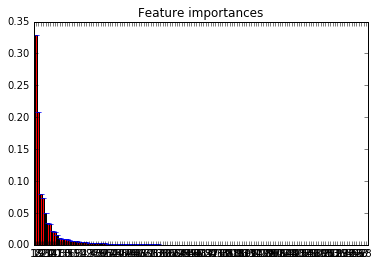

In [54]:
#get feature importances descending
%matplotlib inline
feature_df = pd.DataFrame(feat_frame)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [67]:
wdir = os.getcwd()
os.chdir('C:/Users/kesj/code/')
import bear.bear as br
os.chdir(wdir)
    

C:\Anaconda\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [66]:
feature_df

,0,1
0,feature 18,3.284265e-01
1,feature 19,2.078219e-01
2,feature 22,7.934054e-02
3,feature 23,7.343498e-02
4,feature 21,5.055123e-02
5,feature 24,3.437472e-02
6,feature 0,3.325440e-02
7,feature 14,2.123800e-02
8,feature 20,1.972117e-02
9,feature 17,1.581899e-02


In [70]:
xtrain_colin_test = br.perfect_collinearity_test(X_train)

X2                           VIF = 102.9 R^2 = 0.9903    
X3                           VIF = 103.1 R^2 = 0.9903    
X4                           VIF = 552.7 R^2 = 0.9982    
X5                           VIF = 3835.8R^2 = 0.9997    
X6                           VIF = 3205.4R^2 = 0.9997    
X13                          VIF = 3.2   R^2 = 0.6854    
X21                          VIF = 2.0   R^2 = 0.5065    
X22                          VIF = 2.3   R^2 = 0.5705    
X24                          VIF = 1.9   R^2 = 0.4801    
X25                          VIF = 2.5   R^2 = 0.5942    
X26                          VIF = 1.9   R^2 = 0.4776    
X27                          VIF = 3.8   R^2 = 0.7388    
X28                          VIF = 2.0   R^2 = 0.5063    
X29                          VIF = 3.4   R^2 = 0.7039    
X30                          VIF = 3.2   R^2 = 0.6903    
X31                          VIF = 3.9   R^2 = 0.7432    

X7_ 36 months: PERFECT COLLINEARITY ********
['X7_ 60 months', 'X9_G2',

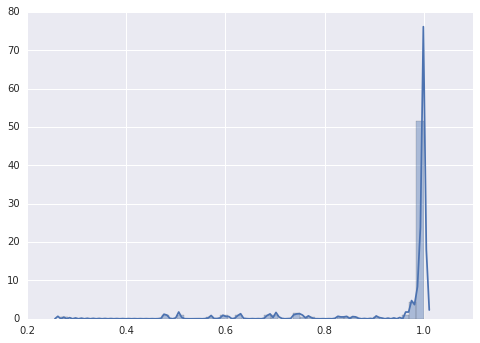

In [90]:
import seaborn as sns
sns.distplot(xtrain_colin_test.values)

In [55]:
#==========================================================
#Score validation data
#==========================================================
ho_data = pd.read_csv("Holdout for Testing.csv", low_memory = False)

#================================================
#clean data
#================================================

#drop 10, 16, 18 due to dummy generation limitations
#also, 16 is missing from validation
ho_data = ho_data.drop(['X10','X16','X18'],1)

#check number of nulls in each column
ho_data.isnull().sum(axis=0)


X1     80000
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X11        0
X12        0
X13        0
X14        0
X15        0
X17        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    38704
X26    66161
X27        0
X28        0
X29        0
X30       30
X31        0
X32        0
dtype: int64

In [39]:
print len(ho_data)

80000

In [ ]:

#clean nulls
ho_data.X8 = ho_data.X8.fillna(0)
ho_data.X9 = ho_data.X9.fillna(0)
ho_data.X12 = ho_data.X12.fillna(0)

In [56]:
ho_medians = {}
ho_medians['X13']=ho_data.X13.median()
ho_medians['X25']=ho_data.X25.median()
ho_medians['X26']=ho_data.X26.median()
print training_medians
print ho_medians

{'X25': 31.0, 'X13': 63000.0, 'X26': 80.0}
{'X25': 30.0, 'X13': 64857.0, 'X26': 67.0}


In [57]:
ho_d2 = ho_data.copy() # save this for later

In [58]:

#data.X30 = data.X30.fillna(0)
ho_data.X13 = ho_data.X13.fillna(ho_data.X13.median())
ho_data.X25 = ho_data.X25.fillna(ho_data.X25.median())
ho_data.X26 = ho_data.X26.fillna(ho_data.X26.median())

#calculate age for 23
#now = pd.Timestamp(DT.datetime.now())
#(now - data['X23']).astype('<m8[Y]')
#data['X23']
#16 - data['X23'].str[-2:].astype(float)

#clean up % data types
#data['X1'] = data['X1'].map(lambda x: x.strip('%')).astype(float)
ho_data['X30'] = ho_data['X30'].fillna('0%')
ho_data['X30'] = ho_data['X30'].map(lambda x: x.replace('%',''))
ho_data['X30'] = ho_data['X30'].astype(float)

#clean up $ data types
ho_data['X4'] = ho_data['X4'].fillna('$0')
ho_data['X5'] = ho_data['X5'].fillna('$0')
ho_data['X6'] = ho_data['X6'].fillna('$0')
ho_data['X4'] = ho_data['X4'].map(lambda x: x.replace(',',''))
ho_data['X5'] = ho_data['X5'].map(lambda x: x.replace(',',''))
ho_data['X6'] = ho_data['X6'].map(lambda x: x.replace(',',''))
ho_data['X4'] = ho_data['X4'].map(lambda x: x.strip('$')).astype(float)
ho_data['X5'] = ho_data['X5'].map(lambda x: x.strip('$')).astype(float)
ho_data['X6'] = ho_data['X6'].map(lambda x: x.strip('$')).astype(float)

#replace all other NaN with 0
ho_data = ho_data.fillna(0)

#check for NAN
ho_data.isnull().sum(axis=0)



X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
X15    0
X17    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
dtype: int64

In [59]:
#create dummy variables for categorical data
dummies1 = pd.get_dummies(ho_data[['X7','X8','X9']])
dummies2 = pd.get_dummies(ho_data[['X11','X12']])
dummies3 = pd.get_dummies(ho_data[['X14']])#,'X15']])
dummies4 = pd.get_dummies(ho_data[['X17']])#,'X19']])
dummies5 = pd.get_dummies(ho_data[['X20','X32']])

#drop original columns from database
ho_data = ho_data.drop(['X7','X8','X9','X11','X12','X14','X17','X20','X32','X15','X19'], axis=1) 

#concatenate dummy variables with dataset
frames2 = [ho_data, dummies1,dummies2,dummies3,dummies4,dummies5]
X_val = pd.concat(frames2, axis = 1)

#set X
#X_val = data



In [60]:
#take target out of attributes
X_val = X_val.drop('X1',1)

#drop 30 and 23, need to do more preprocessing
X_val = X_val.drop('X23',1)

#get predictions for model
predicted_validation = pd.DataFrame(estimator.predict(X_val))



In [63]:
os.getcwd()

'C:\\Users\\kesj\\Documents\\SFinfo\\DSE\\interviewStuff\\WorkSample'

In [64]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 222B-1C6E

 Directory of C:\Users\kesj\Documents\SFinfo\DSE\interviewStuff\WorkSample

02/19/2016  11:57 AM    <DIR>          .
02/19/2016  11:57 AM    <DIR>          ..
02/15/2016  04:16 PM         1,555,356 Applicant_Grader.ipynb
07/24/2015  04:54 PM               790 BasicFunctions.py
08/21/2015  04:23 AM       115,872,562 Data for Cleaning & Modeling.csv
08/21/2015  04:06 AM        17,283,347 Holdout for Testing.csv
02/10/2016  04:26 PM        26,320,497 Holdout.csv
08/17/2015  04:26 AM             2,045 Instructions.txt
08/04/2015  01:01 PM             1,738 Metadata.csv
08/24/2015  09:22 AM        18,245,814 Work Sample for Job# 55069.zipx
               8 File(s)    179,282,149 bytes
               2 Dir(s)  87,728,939,008 bytes free


In [65]:
predicted_validation.to_csv('forest_regressor_predictors.csv')

In [ ]:
## recreate with a different split


In [94]:
# split the dataset into testing and training
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=993)

# build a classifier
estimator2 = RandomForestRegressor(n_estimators=20)

In [95]:
start = time()
estimator2.fit(X_train2, y_train2)

estimator_fit2 = estimator2.fit(X_train2, y_train2)  
predictions2 = estimator2.predict(X_train2)              
predict_test2 = estimator2.predict(X_test2) 

#score model on test data
estimator2.score(X_test2,y_test2)

#get metrics for best fit
print("Best estimator:")
    
# generate predictions for apr
apr2 = predict_test2
print apr2

#get MSE
MSE2 = mean_squared_error(y_test2, apr2)
#get RMSE
RMSE2 = sqrt(mean_squared_error(y_test2, apr2))

#print metrics
print MSE2
print RMSE2



Best estimator:
[ 14.6505  17.506   25.99   ...,   7.62    17.25    13.11  ]
1.36143495043
1.16680544669


In [97]:
predicted_validation2 = pd.DataFrame(estimator2.predict(X_val))


In [106]:
predicted_validation2.to_csv('forest_regressor_2Predictions.csv')

In [107]:
data[data['X1']>0].X8.value_counts()

B    86121
C    76446
D    46984
A    45525
E    21628
F     8395
G     2024
Name: X8, dtype: int64

In [113]:
x8cols = [col for col in X.columns.tolist() if col.startswith('X8')]

In [121]:
n_train = float(len(X))
n_val = float(len(X_val))
for c in x8cols:
    print 'column {0} has {1} % in training and {2} % in validation.'.format(c, X[c].value_counts().values[1]/n_train*100.,X_val[c].value_counts().values[1]/n_val*100.)

column X8_A has 13.4295996932 % in training and 17.23375 % in validation.
column X8_B has 25.4051741939 % in training and 26.63625 % in validation.
column X8_C has 22.5511077023 % in training and 28.58625 % in validation.
column X8_D has 13.8599958701 % in training and 16.2375 % in validation.
column X8_E has 6.38012920735 % in training and 8.38 % in validation.
column X8_F has 2.47647423228 % in training and 2.30625 % in validation.
column X8_G has 0.597067760111 % in training and 0.62 % in validation.


In [119]:
X_val[c].value_counts()

0    79504
1      496
Name: X8_G, dtype: int64

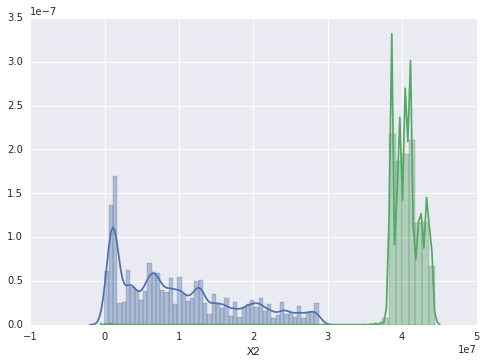

In [124]:
sns.distplot(X['X2'])
sns.distplot(X_val['X2'])


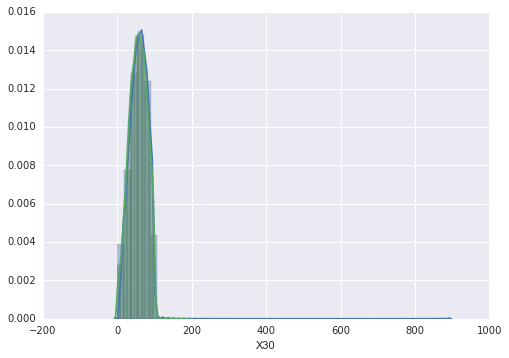

In [125]:
sns.distplot(X['X30'])
sns.distplot(X_val['X30'])


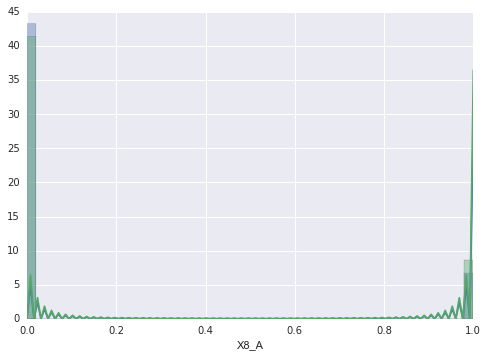

In [126]:
sns.distplot(X['X8_A'])
sns.distplot(X_val['X8_A'])


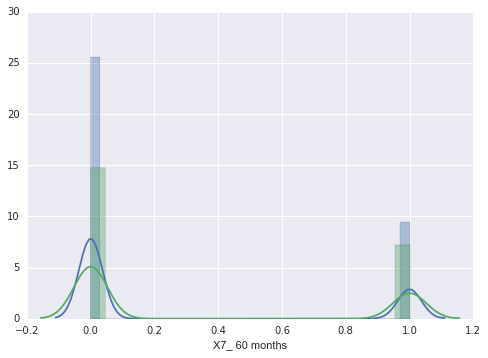

In [127]:
sns.distplot(X['X7_ 60 months'])
sns.distplot(X_val['X7_ 60 months'])

### try to drop some features and repeat

In [128]:
xtrain_colin_test

X2               0.990282
X3               0.990296
X4               0.998191
X5               0.999739
X6               0.999688
X13              0.685414
X21              0.506509
X22              0.570503
X24              0.480109
X25              0.594171
X26              0.477635
X27              0.738793
X28              0.506309
X29              0.703856
X30              0.690267
X31              0.743208
X7_ 36 months    1.000000
X7_ 60 months    1.000000
X8_A             1.000000
X8_B             1.000000
X8_C             1.000000
X8_D             1.000000
X8_E             1.000000
X8_F             1.000000
X8_G             1.000000
X9_A1            1.000000
X9_A2            1.000000
X9_A3            1.000000
X9_A4            1.000000
X9_A5            1.000000
                   ...   
X20_MD           0.997681
X20_MI           0.997716
X20_MN           1.000000
X20_MO           0.996393
X20_MS           0.977279
X20_MT           0.984357
X20_NC           1.000000
X20_NH      

In [132]:
len(xtrain_colin_test[xtrain_colin_test<1.0]), len(xtrain_colin_test),len(xtrain_colin_test[xtrain_colin_test<0.999])
#, len(xtrain_colin_test)

(115, 139, 65)

In [133]:
reduced_cols = xtrain_colin_test[xtrain_colin_test<0.999].index.tolist()

In [134]:
# split the dataset into testing and training
rX_train, rX_test, ry_train, ry_test = train_test_split(X[reduced_cols], y, test_size=0.3, random_state=0)

# build a classifier
estimatorR = RandomForestRegressor(n_estimators=20)

In [136]:
start = time()
estimatorR.fit(rX_train, ry_train)

#estimator_fitR = estimatorR.fit(rX_train, ry_train)  
predictionsR = estimatorR.predict(rX_train)              
predict_testR = estimatorR.predict(rX_test) 

#score model on test data
#estimatorR.score(rX_test,ry_test)

#get metrics for best fit
print("Best estimator:")
    
# generate predictions for apr
#apr = predict_test
#print apr

#get MSE
print mean_squared_error(ry_test, predict_testR)
#get RMSE
print sqrt(mean_squared_error(ry_test, predict_testR))
predicted_validationR = pd.DataFrame(estimatorR.predict(X_val[reduced_cols]))

Best estimator:
10.7121994692
3.27294965882


In [137]:
predicted_validationR.to_csv('forest_regressor_PredictionsR.csv')

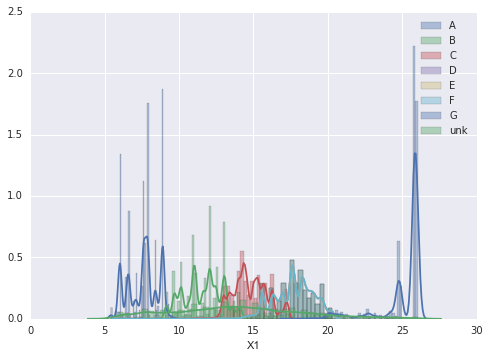

In [151]:
sns.distplot(dd[X.X8_A==1].X1,label='A')
sns.distplot(dd[X.X8_B==1].X1,label='B')
sns.distplot(dd[X.X8_C==1].X1,label='C')
sns.distplot(dd[X.X8_D==1].X1,label='D')
sns.distplot(dd[X.X8_D==1].X1,label='E')
sns.distplot(dd[X.X8_D==1].X1,label='F')
sns.distplot(dd[X.X8_G==1].X1,label='G')
sns.distplot(dd[(data.X1>0) & (data.X8.isnull())].X1,label='unk')
plt.legend()

In [145]:
data.X8.value_counts()

B    101668
C     90071
D     55621
A     53707
E     25518
F      9784
G      2361
Name: X8, dtype: int64

In [150]:
dd[(data.X1>0) & (data.X8.isnull())].X1

165        7.75
182       11.54
212       10.28
222       10.91
224       11.86
233       10.28
234        9.64
235       10.59
260       12.80
263        9.33
264        9.64
268        9.33
273        9.01
276        9.64
282       10.59
283       14.38
287        9.96
288        8.38
300        7.12
305        9.01
1691      17.15
1704       9.32
1714      12.72
1721      15.05
1732      11.58
1734       9.63
1747       9.32
1758      16.95
1765      12.21
1768      15.68
          ...  
399746    10.15
399750    12.49
399754    14.49
399774     7.12
399785    12.99
399789    16.99
399792    11.67
399794    13.35
399795     7.12
399810     7.12
399817    12.49
399827    18.99
399837     9.17
399844    17.57
399872    14.49
399873    14.49
399879    11.67
399881    13.98
399887    12.99
399900    15.61
399905    11.67
399920    14.99
399942    19.24
399957     6.03
399978    16.99
399980    20.20
399983    15.61
399985    11.67
399986     7.12
399990    14.49
Name: X1, dtype: float64

In [176]:
#for param in 
tree0 = estimator.estimators_[0]
tree0.splitter

'best'

In [183]:
for tree in estimator.estimators_:
    print tree.tree_.max_depth, len(tree.tree_.feature)

50 51685
48 52095
52 51835
57 51863
52 51875
47 51925
51 51587
50 52033
52 51587
49 52107
45 51811
46 52019
50 51725
45 51415
49 52061
47 51741
47 52049
52 51753
55 52047
50 51815


In [189]:
#len(tree.tree_.feature)
tree.tree_.

array([50500, 46851, 46528, ..., 51814,    -1,    -1], dtype=int64)

In [164]:
estimator.get_params

<bound method RandomForestRegressor.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>